In [35]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
%matplotlib inline

import pyqg

In [43]:
# the model object
year = 1.
U0 = -.01
dt = 0.01
nmax = 10000  # of timesteps

m = pyqg.BTModel(L=2.*pi,nx=256, tmax = nmax*dt,
        beta = 0., U = U0, H = 1., rek = 0., rd = None, dt = dt,
                taveint=year, ntd=4)

INFO:  Logger initialized
INFO:  Kernel initialized


# Initial condition: the Lamb dipole
The Lamb dipole is an exact solution to the NS equation. If pyqg is accurate, then the initial condition shouldn't move relative to a frame moving with the dipole (hence the trick of using -U0 as background velocity). 

In [44]:
N = m.nx
R = 0.75
E0 = .5
U = -m.U

import scipy.special as special

x, y = m.x, m.y
x0,y0 = x[N/2,N/2],y[N/2,N/2]

r = np.sqrt( (x-x0)**2 + (y-y0)**2 )
s = np.ma.zeros(r.shape)

s = (y-y0)/r            
s = np.ma.masked_invalid(s).filled(0.)

lam = (pi*1.2197)/R

# Lamb's
C = (-2.*U*lam)/(special.j0(lam*R))
qi = np.zeros_like(r)
qi[r<=R] = C*special.j1(lam*r[r<R])*s[r<R]

/Users/crocha/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in divide


In [45]:
m.set_q(qi[np.newaxis])

<matplotlib.colorbar.Colorbar instance at 0x10f968050>

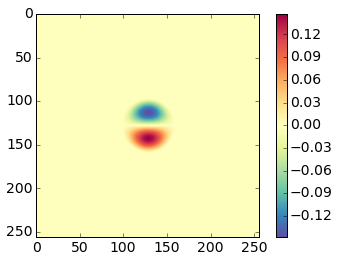

In [46]:
plt.imshow(m.q[0])
plt.colorbar()

In [47]:
m.run()

INFO: Step: 1000, Time: 1.00e+01, KE: 8.75e-06, CFL: 0.010
INFO: Step: 2000, Time: 2.00e+01, KE: 8.75e-06, CFL: 0.010
INFO: Step: 3000, Time: 3.00e+01, KE: 8.75e-06, CFL: 0.010
INFO: Step: 4000, Time: 4.00e+01, KE: 8.75e-06, CFL: 0.010
INFO: Step: 5000, Time: 5.00e+01, KE: 8.75e-06, CFL: 0.010
INFO: Step: 6000, Time: 6.00e+01, KE: 8.75e-06, CFL: 0.010
INFO: Step: 7000, Time: 7.00e+01, KE: 8.75e-06, CFL: 0.010
INFO: Step: 8000, Time: 8.00e+01, KE: 8.75e-06, CFL: 0.010
INFO: Step: 9000, Time: 9.00e+01, KE: 8.75e-06, CFL: 0.010


<matplotlib.colorbar.Colorbar instance at 0x117a0ab48>

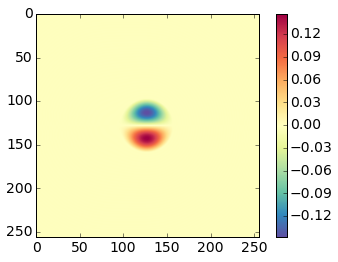

In [53]:
plt.imshow(m.q[0])
plt.colorbar()